# 统计思维课程
## 简介
本课程是建立在利用Python实现概率论与数理统计的基础上的一门关于数据分析的基础课程，利用Python语言将统计学的主要脉络进行了概览性的分析与讨论。
## 课程的主要内容与安排
* 统计思维的简介
* 描述性统计
* 累积分布
* 连续分布
* 指数分布
* 概率
* 分布的运算
* 假设检验
* 估计
* 相关性
* 推荐阅读

## 统计思维简介
本课程中，将主要介绍三门相互关联的学科，即概率论，统计学，计算。从而获得概率论与统计学的知识与思维方式。以计算为实现手段剖析概率论与数理统计的数学思维。

### 当下热点：二胎问题
和生孩子最有关系的是生孩子的时间，比如妊娠期超过了某一段时间就会晚产，太少则是早产。

关于这类问题其实已经有了很多的经验之谈，你去医院的产房就能听到很多，但是经验之谈有很多实际的问题，让经验之谈的价值几乎为零：

* 观察数量太少，个人的经验之谈往往并没有怎样的借鉴作用，如果是医生或者产科护士则另当别论。
* 选择偏差，一般来说第一胎比较晚的父母才会有兴趣加入这样的讨论，正常人谁管你。
* 确认偏差，支持实例和反例其实都不少
* 不精确，传闻、个人经历在记忆和复述中会造成极大地麻烦。

### 统计方法——你可以信任的伙伴
对于上述几类问题的描述，我们可以运用统计学的手段来进行解决：

* 数据收集
* 描述性统计
* 探索性数据分析（值得一提，虽然统计学这门学科从伦敦大瘟疫时代就开始萌芽，但是探索性数据分析则是1980年左右才开始的一项新的探索。瞧！我在这里的左右又让你们的数据价值降低了不少）
* 假设检验
* 估计

## 描述性统计量
### 均值和平均值
假设一个包含n个值的样本Xi,他们的均值u就等于他们的值的总和除以值的数量，这是非常显而易见的事情，如公式：

$$\mu =\frac{1}{n}\sum x_{i}$$

值得注意的是，在很多情况下均值(mean)和平均值(average)在很多情况下是相同的，但是在本质上依然是有区别的：

* 样本的“均值”是根据公式计算出来的一个汇总统计量
* 而“平均值”是若干种可以描述样本的典型值或者集中趋势的汇总统计量之一

** 注意： 均值的使用 **

In [3]:
import numpy as np
apples = [1,2,1,3,1,2,3,1]
mean_apples = np.mean(apples)
print mean_apples

1.75


In [4]:
duch = [10,10,300]
mean_duch = np.mean(duch)
print mean_duch

106.666666667


### 方差
上面的例子，很明显的说明了南瓜的平均值并不能很好的概括一个数组的情况，为了让问题能够解决，我们引入了方差。他既是平均值的助手也是均值的对立。

* 方差能够很好的涵盖上述南瓜的问题
* 方差描述分散情况而非集中趋势，这正好与均值的集中趋势相反

$$\sigma ^{2}=\frac{1}{n}\sum (x_{i}- \mu )^{2}$$

$$x_{i}- \mu$$ 

这一部分是离均差，即方差是偏差的方均值。取方差的算术根就是标准差。

相对于方差而言标准差的优势在于标准差的量纲是和统计量一致的。

In [5]:
var_apples = np.var(apples)
var_duch = np.var(duch)
print var_apples, var_duch

0.6875 18688.8888889


### 样本方差概览
已经接触过概率论与数理统计或者统计学的人应该已经知道了样本方差这一概念，样本方差的具体概念将在后续继续谈论，这和无偏性有关，在此仅仅先给出一个公式：

$$\sigma ^{2}=\frac{1}{n-1}\sum (x_{i}- \mu )^{2}$$

### 分布
对于数据而言，汇总统计量虽然简单明了，但是往往会带来很多的问题，也不能很细致入微的解决很多的问题，于是，分布这一概念就出现了。

**分布：描述各个值出现的频繁程度**

表示分布最常用的方法是直方图，不妨我们利用Python来给一个实例。下述代码块为Python应用的归一化格式。

        # 归一化
        hist = {}
        for x in t:
            hist[x] = hist.get(x, 0) + 1
        # 概率化
        n = float(len(t))
        pmf = {}
        for x, freq in hist.items():
            pmf[x] = freq / n



In [6]:
hist_apples = {}
for x in apples:
    hist_apples[x] = hist_apples.get(x, 0) + 1
print hist_apples

{1: 4, 2: 2, 3: 2}


In [7]:
n = float(len(apples))
pmf_apples = {} # PMF = Probability Mass Function
for x, freq in hist_apples.items():
    pmf_apples[x] = freq / n
print pmf_apples

{1: 0.5, 2: 0.25, 3: 0.25}


#### 分布的绘画——直方图
两种绘制直方图的方法，第一种是比较经典的采用matplotlib的方法。第二种则是采用交互式JS撰写的Bokeh的方法。后者可视性更强，前者非常简单。因此本教程中仅仅用mlt来完成演示，而Bokeh将在后期bokeh中专门讲述。

Populating the interactive namespace from numpy and matplotlib
[1, 2, 3] [0.5, 0.25, 0.25]


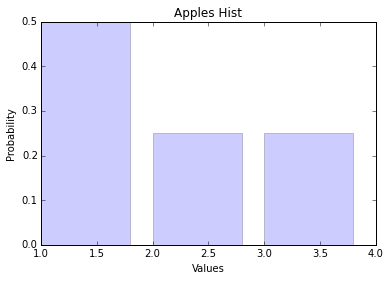

In [8]:
%pylab inline
# matplotlib
import  matplotlib.pyplot as plt  
vals = pmf_apples.keys()
freqs = pmf_apples.values()
print vals, freqs
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Apples Hist')
plt.bar(vals,freqs, alpha = .2, color = 'b')
plt.show()

直方图很有用，可以很直观的给出下列特征：

* 众数：次数最多者，在本图中即为1
* 形状：到底是对称还是不对称，是偏峰还是如何？
* 异常值是如何？

### 正态分布的图像

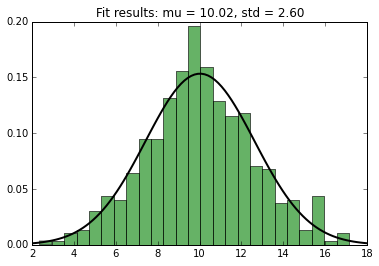

In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)
# Fit a normal distribution to the data:
mu, std = norm.fit(data)
# Plot the histogram.
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.show()

### 条件概率

事件A在另外一个事件B已经发生条件下的发生概率。

$$P(A|B)=\frac{P(AB)}{P(B)}$$

## 累积分布函数
现在我们有一个关于上大课和小班的统计表：

|人数|5~9|10~14|15~19|20~24|25~29|30~34|35~39|40~44|45~49|
|---|---|---|---|
|课程数|8|8|14|4|6|12|8|3|2|

现在如果要获得和上述一样的PMF，均值应该这么做呢？对于分组数据，使用中点值是可以考虑的。

In [10]:
x = number_p = [i for i in range(7,50,5)]
y = number_c = [8, 8, 14, 4, 6, 12, 8, 3, 2]
print number_p,"\n", number_c

[7, 12, 17, 22, 27, 32, 37, 42, 47] 
[8, 8, 14, 4, 6, 12, 8, 3, 2]


In [11]:
hist_numbers = {}
for x in number_p:
    hist_numbers[x] = hist_numbers.get(x, 0) + 1
n = float(len(number_p))
pmf_numbers = {}
for x, freq in hist_numbers.items():
    pmf_numbers[x] = freq / n

In [12]:
print hist_numbers, pmf_numbers

{32: 1, 37: 1, 7: 1, 42: 1, 12: 1, 47: 1, 17: 1, 22: 1, 27: 1} {32: 0.1111111111111111, 37: 0.1111111111111111, 7: 0.1111111111111111, 42: 0.1111111111111111, 12: 0.1111111111111111, 47: 0.1111111111111111, 17: 0.1111111111111111, 22: 0.1111111111111111, 27: 0.1111111111111111}


### PMF的不足之处
对于数据量较小的情况下，PMF很适合，而随着数据的增大，随机噪声会越来越厉害，解决的方法主要有：

* 区间分组方法
* 累积分布函数

### 百分位数
百分位数是非常有效的一种统计方法，不妨先看看，在Python中如何实现，随后用一个例子来说明，百分位数的含义。

In [17]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [18]:
scores = [100,33,25,39,12,31,75,81,91,93,50,70,69,68,40]
your_score = 83
PercentileRank(scores, your_score)

80.0

#### 百分位数的其他算法实现

显然，百分位数采用上述算法效率很低，有两类算法比上述算法更有效，我们将在未来的算法课程中谈到：

1. 排序算法
2. 选择算法

### 累积分布函数 CDF
CDF是什么？最简单的理解方式就是CDF函数就是值到其在分布中百分等级的映射。

CDF是关于x的函数，其中x是分布中的某一个值，计算给定x的CDF（x），其实就是计算小于等于x的值的比例。

In [19]:
def CDF(t, x):
    count = 0.0
    for value in t:
        if value <= x:
            count += 1.0
            
    prob = count / len(t)
    return prob

#### CDF与百分位数
事实上 CDF与上述的百分位数其实很相似，差别也仅仅是在于0~100和0~1而已。而0~1恰恰是柯尔莫哥洛夫提出的概率论三大公理之首。

In [20]:
CDF(scores, your_score)

0.8

## 连续分布
在上述所有的情况下，我们介绍的都是经验分布，下述内容属于连续分布。即CDF是一个连续函数。

希望大家能够理解，在实际与理论中，往往离散和连续在某些情况下是可以互相转换的。

### 指数分布

$$ y = 1 - e^{-\lambda x} $$
$$P = \lambda e^{-\lambda x}$$

其中，参数λ决定了分布的形状。关于指数分布的特征值，我们有一下的结论：

$$E(X) = \frac{1}{\lambda }$$

$$Median(X) = \frac{log(2)}{\lambda }$$

$$Var(X) = \frac{1}{\lambda ^{2}}$$

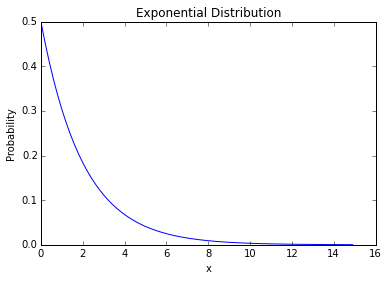

In [38]:
la = 0.5
x = np.arange(0, 15, 0.1)
y = la * np.exp(-la * x)
cdf = 1 - exp(-la * x)
plt.plot(x,y)
plt.title("Exponential Distribution")
plt.xlabel('x')
plt.ylabel('Probability')
plt.show()

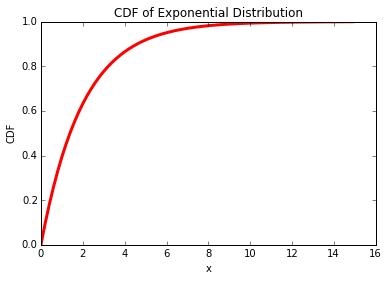

In [39]:
plt.plot(x,cdf,color = "red", linewidth = 3)
plt.title("CDF of Exponential Distribution")
plt.xlabel('x')
plt.ylabel('CDF')
plt.show()

### 正态分布
正态分布又称作高斯分布，由于其在自然界存在的广泛性，正态分布有着广泛的应用，尤其是随着中心极限定律的提出，正态分布的应用被提高到了前所未有的高度。

$$P(X;\mu,\sigma ) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

$$E(X)=\mu$$
$$Var(X)=\sigma^{2}$$

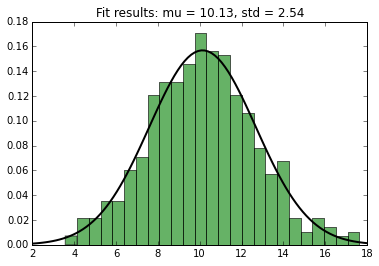

In [40]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)
# Fit a normal distribution to the data:
mu, std = norm.fit(data)
# Plot the histogram.
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.show()

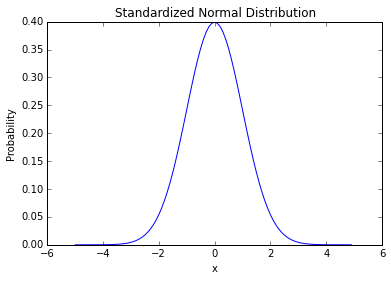

In [43]:
import scipy as sp
# standardized normal distribution
mu = 0
sigma = 1
x = np.arange(-5, 5, 0.1)
y = sp.stats.norm.pdf(x, 0, 1)
plt.plot(x, y)
plt.title("Standardized Normal Distribution")
plt.xlabel('x')
plt.ylabel('Probability')
plt.show()

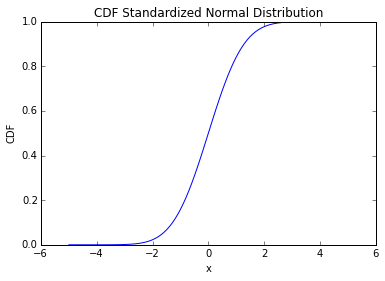

In [46]:
import scipy as sp
# standardized normal distribution
mu = 0
sigma = 1
x = np.arange(-5, 5, 0.1)
y = sp.stats.norm.cdf(x, 0, 1)
plt.plot(x, y)
plt.title("CDF Standardized Normal Distribution")
plt.xlabel('x')
plt.ylabel('CDF')
plt.show()

## 概率

在上述中，我们已经提到了概率求取的一种方式，即在有频数n与样本数量N的时候，我们采取$$ P = \frac{n}{N}$$ 作为概率。

我们假设各位已经有了概率论的基本认识，从而跳入概率认识的两大学派之中，即：

* 频率学派（frequentism）
* 贝叶斯学派（bayesianism）

频率学派我们已经很熟悉了，在大量实验的基础下，频率即为概率。而贝叶斯学派，则是根据贝叶斯公式而推倒出的整个概率论的学派。

$$P(B_{i}|A) = \frac{P(B_{i}P(A|B_{i}))}{\sum P(B_{j})P(A|B_{j})}$$

### 概率论的常用公式

1. 在事件彼此独立的情况下：

$$P(\prod A_{i}) = \prod P(A_{i})$$

2. 在不独立的情况下，通过条件概率公式我们可以获得：

$$P(AB) = P(A)P(A|B)$$

#### 在上述的基础上，我们不妨来论证三门问题

**蒙提霍尔问题、蒙特霍问题或蒙提霍尔悖论**，大致出自美国的电视游戏节目Let's Make a Deal。问题名字来自该节目的主持人蒙提·霍尔（Monty Hall）。参赛者会看见三扇关闭了的门，**其中一扇的后面有一辆汽车，选中后面有车的那扇门可赢得该汽车，另外两扇门后面则各藏有一只山羊**。当参赛者选定了一扇门，但未去开启它的时候，**节目主持人开启剩下两扇门的其中一扇，露出其中一只山羊**。主持人其后会问参赛者要不要换另一扇仍然关上的门。问题是：**换另一扇门会否增加参赛者赢得汽车的机会率？**

** 所以要中大奖？先学好概率论再说 **

## 概率论中的经典离散分布

### 二项分布
![](http://ww4.sinaimg.cn/mw690/6941baebgw1ereiqab04dj208r023weh.jpg)

$$ E(X) = np$$

$$ Var(X) = np(1-p) = npq $$

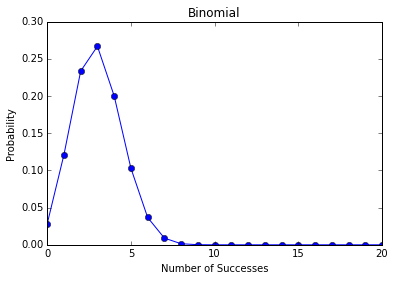

In [47]:
n = 10
p = 0.3
k = np.arange(0, 21)
binomial = sp.stats.binom.pmf(k, n, p)
plt.plot(k, binomial, 'o-')
plt.title('Binomial')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

#### 由二项分布提出的更有意义的问题——蒙特卡洛模拟
![](http://g.hiphotos.baidu.com/baike/w%3D268/sign=ffb44627b4fd5266a72b3b1293199799/eac4b74543a98226b18361eb8882b9014b90ebb8.jpg)
      当所要求解的问题是某种事件出现的概率，或者是某个随机变量的期望值时，它们可以通过某种“试验”的方法，得到这种事件出现的频率，或者这个随机变数的平均值，并用它们作为问题的解。这就是蒙特卡罗方法的基本思想。蒙特卡罗方法通过抓住事物运动的几何数量和几何特征，利用数学方法来加以模拟，即进行一种数字模拟实验。它是以一个概率模型为基础，按照这个模型所描绘的过程，通过模拟实验的结果，作为问题的近似解。可以把蒙特卡罗解题归结为三个主要步骤：构造或描述概率过程；实现从已知概率分布抽样；建立各种估计量。
